In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [3]:
# Load the datasets
X_train = pd.read_csv("data/train_test/X_train.csv", index_col=0)
X_test = pd.read_csv("data/train_test/X_test.csv", index_col=0)
y_train = pd.read_csv("data/train_test/y_train.csv", index_col=0).squeeze()
y_test = pd.read_csv("data/train_test/y_test.csv", index_col=0).squeeze()

In [4]:
# Display shapes of the datasets to confirm loading
print("Shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")



Shapes:
X_train: (2405056, 35)
X_test: (601264, 35)
y_train: (2405056, 0)
y_test: (601264, 0)


In [5]:
# Display the first few rows of X_train and y_train
X_train.head()


,polararea_A,complexity_A,heavycnt_A,hbonddonor_A,hbondacc_A,rotbonds_A,exactmass_A,monoisotopicmass_A,charge_A,covalentunitcnt_A,...,monoisotopicmass_B,charge_B,covalentunitcnt_B,isotopeatomcnt_B,totalatomstereocnt_B,definedatomstereocnt_B,undefinedatomstereocnt_B,totalbondstereocnt_B,definedbondstereocnt_B,undefinedbondstereocnt_B
mw_A,,,,,,,,,,,,,,,,,,,,,
472.50,212.0,704.0,34,6,13,9,472.1820,472.1820,0,2,...,481.168,0,1,0,2,0,2,1,1,0
44.05,17.1,10.3,3,0,1,0,44.0262,44.0262,0,1,...,4111.120,0,1,0,30,30,0,0,0,0
1041.80,629.0,2110.0,58,3,38,12,1040.7100,1040.7100,-8,5,...,361.144,0,1,0,1,1,0,0,0,0
281.35,46.9,413.0,21,1,3,2,281.1530,281.1530,0,1,...,320.111,0,2,0,1,0,1,0,0,0
359.40,96.8,469.0,25,1,6,7,359.1230,359.1230,0,1,...,392.200,0,1,0,8,7,1,0,0,0


In [6]:
y_train.head()

""
Level
1
1
1
1
1


In [7]:
# Check for missing values
print("\nMissing values:")
X_train.isnull().sum()


Missing values:


polararea_A                 0
complexity_A                0
heavycnt_A                  0
hbonddonor_A                0
hbondacc_A                  0
rotbonds_A                  0
exactmass_A                 0
monoisotopicmass_A          0
charge_A                    0
covalentunitcnt_A           0
isotopeatomcnt_A            0
totalatomstereocnt_A        0
definedatomstereocnt_A      0
undefinedatomstereocnt_A    0
totalbondstereocnt_A        0
definedbondstereocnt_A      0
undefinedbondstereocnt_A    0
mw_B                        0
polararea_B                 0
complexity_B                0
heavycnt_B                  0
hbonddonor_B                0
hbondacc_B                  0
rotbonds_B                  0
exactmass_B                 0
monoisotopicmass_B          0
charge_B                    0
covalentunitcnt_B           0
isotopeatomcnt_B            0
totalatomstereocnt_B        0
definedatomstereocnt_B      0
undefinedatomstereocnt_B    0
totalbondstereocnt_B        0
definedbon

In [8]:
X_test.isnull().sum()

polararea_A                 0
complexity_A                0
heavycnt_A                  0
hbonddonor_A                0
hbondacc_A                  0
rotbonds_A                  0
exactmass_A                 0
monoisotopicmass_A          0
charge_A                    0
covalentunitcnt_A           0
isotopeatomcnt_A            0
totalatomstereocnt_A        0
definedatomstereocnt_A      0
undefinedatomstereocnt_A    0
totalbondstereocnt_A        0
definedbondstereocnt_A      0
undefinedbondstereocnt_A    0
mw_B                        0
polararea_B                 0
complexity_B                0
heavycnt_B                  0
hbonddonor_B                0
hbondacc_B                  0
rotbonds_B                  0
exactmass_B                 0
monoisotopicmass_B          0
charge_B                    0
covalentunitcnt_B           0
isotopeatomcnt_B            0
totalatomstereocnt_B        0
definedatomstereocnt_B      0
undefinedatomstereocnt_B    0
totalbondstereocnt_B        0
definedbon

In [9]:
# Handle missing values (if any)
# This example fills missing values with the column mean
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

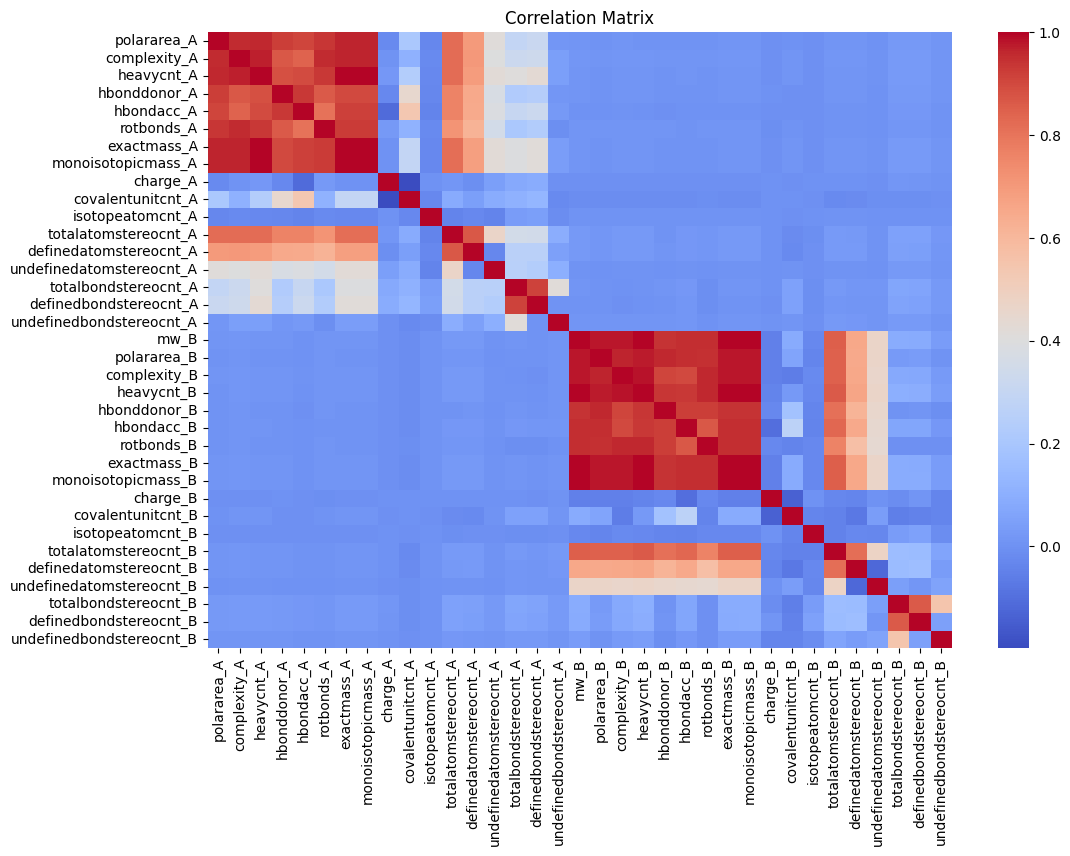

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [12]:
high_corr_pairs = corr_matrix.abs().stack().reset_index().query("level_0 != level_1 and 0 > 0.8")
high_corr_pairs

,level_0,level_1,0


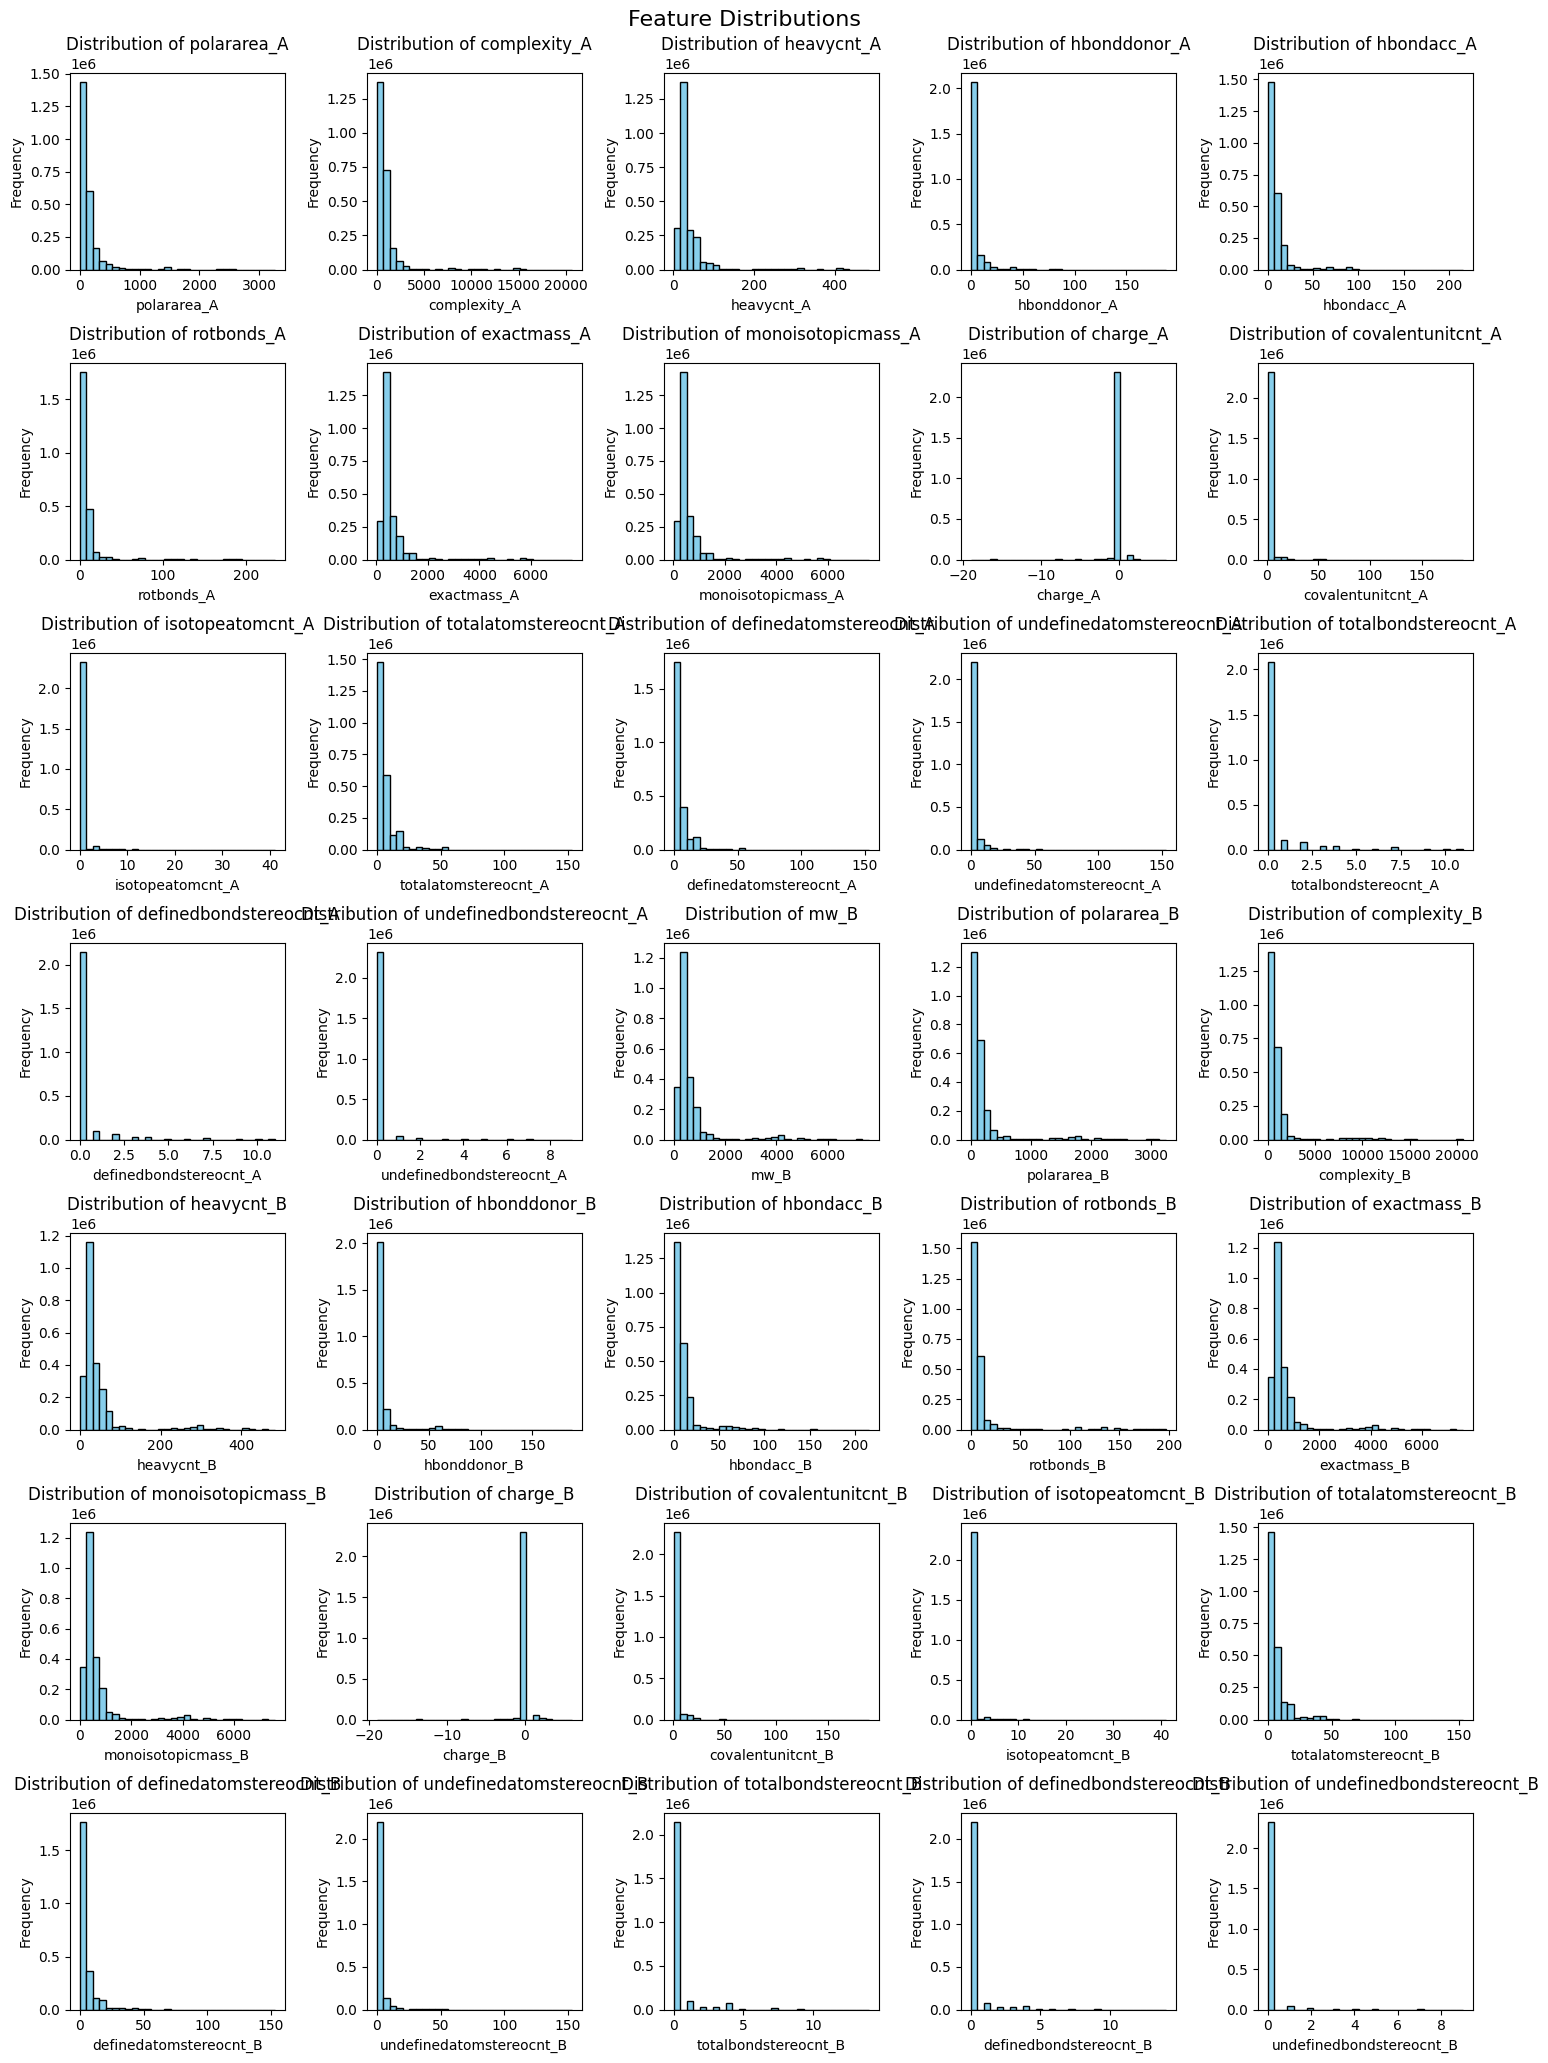

In [14]:
import matplotlib.pyplot as plt

# Define number of columns in the grid layout
num_columns = 5
num_features = X_train.shape[1]
num_rows = (num_features // num_columns) + (num_features % num_columns > 0)

# Create subplots with a grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, num_rows * 3))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each feature in the grid
for i, column in enumerate(X_train.columns):
    axes[i].hist(X_train[column], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.suptitle("Feature Distributions", fontsize=16)
plt.subplots_adjust(top=0.95)  # Adjust the title position

plt.show()


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Select numerical columns from X_train
# numerical_columns = X_train.select_dtypes(include='number').columns

# # Melt the DataFrame to long format
# X_train_melted = X_train[numerical_columns].melt(var_name='variable', value_name='value')

# # Create a FacetGrid with the numerical columns in long format
# g = sns.FacetGrid(X_train_melted, col="variable", col_wrap=4, height=3)

# # Map the kdeplot to each facet (plotting each column's distribution)
# g.map(sns.kdeplot, "value", fill=True)

# # Adjust titles and labels
# g.set_axis_labels('Value', 'Density')
# g.set_titles("{col_name}")

# # Adjust layout for readability
# plt.subplots_adjust(top=0.9)
# g.fig.suptitle('Feature Distributions', fontsize=16)

# plt.show()


Number of components to explain at least 80% variance: 8
Explained variance ratio for each component: [0.2901242  0.26553397 0.06046663 0.05119178 0.03768761 0.03488122
 0.0320639  0.03004301]
Cumulative explained variance: 0.8019923374746455


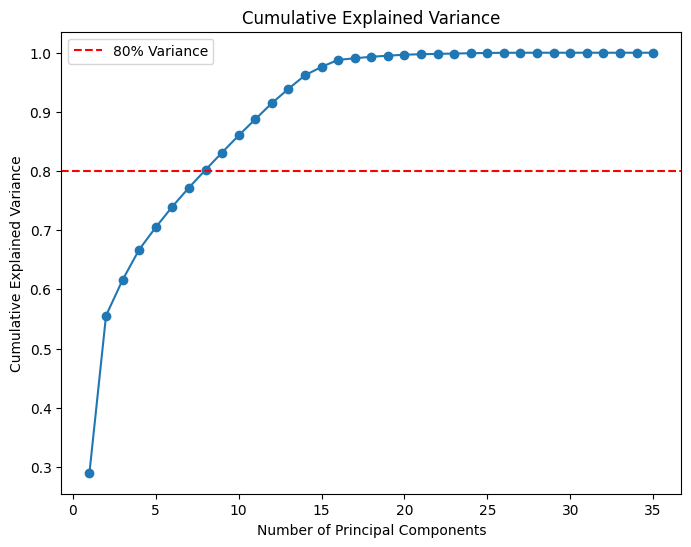

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize PCA without specifying the number of components
pca = PCA()

# Fit PCA on the standardized data
pca.fit(X_train_scaled)

# Calculate the cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Find the number of components needed to explain at least 80% of the variance
n_components = (cumulative_variance >= 0.80).argmax() + 1  # Add 1 because index starts at 0

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)

# Print the number of components and the variance explained
print(f"Number of components to explain at least 80% variance: {n_components}")
print(f"Explained variance ratio for each component: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {cumulative_variance[n_components - 1]}")

# Optionally: visualize the explained variance to verify the result
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(0.80, color='r', linestyle='--', label="80% Variance")
plt.legend()
plt.show()


In [ ]:
# Train a model with scikit-learn (RandomForest as an example)
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)



/home/franco/miniconda3/envs/balancium-rx/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest Results:
Accuracy: 0.9910388780968094
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     53422
           1       0.99      1.00      0.99    454153
           2       0.99      0.98      0.98     93689

    accuracy                           0.99    601264
   macro avg       0.99      0.98      0.98    601264
weighted avg       0.99      0.99      0.99    601264



In [ ]:
accuracy_score(y_test, rf_predictions)


In [1]:
classification_report(y_test, rf_predictions)

NameError: name 'classification_report' is not defined

In [ ]:
# Train a model with XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)



/home/franco/miniconda3/envs/balancium-rx/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:32:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.8996613800260784
              precision    recall  f1-score   support

           0       0.93      0.60      0.73     53422
           1       0.89      0.99      0.94    454153
           2       0.93      0.65      0.76     93689

    accuracy                           0.90    601264
   macro avg       0.92      0.75      0.81    601264
weighted avg       0.90      0.90      0.89    601264



In [ ]:
accuracy_score(y_test, xgb_predictions)


In [ ]:
classification_report(y_test, xgb_predictions)

In [ ]:
# Train a model with LightGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_test)



/home/franco/miniconda3/envs/balancium-rx/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/franco/miniconda3/envs/balancium-rx/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.216882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3824
[LightGBM] [Info] Number of data points in the train set: 2405056, number of used features: 36
[LightGBM] [Info] Start training from score -2.428502
[LightGBM] [Info] Start training from score -0.278824
[LightGBM] [Info] Start training from score -1.863310

LightGBM Results:
Accuracy: 0.8663116368184358
              precision    recall  f1-score   support

           0       0.92      0.43      0.59     53422
           1       0.86      0.99      0.92    454153
           2       0.93      0.52      0.67     93689

    accuracy                           0.87    601264
   macro avg       0.90      0.65      0.73    601264
weighted avg       0.87      0.87      0.85    601264



In [ ]:
accuracy_score(y_test, lgbm_predictions)


In [ ]:
classification_report(y_test, lgbm_predictions)